# Análise Individual

In [1]:
import pandas as pd
import numpy as np
import pypfopt as pf
import quant_tools as qt                        # módulo de funções quants auxiliares
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.figure_factory as ff
import visuals                                  # módulo de visualização pessoal
from portfolio_class import Portfolio           # classe auxiliar
import joblib as jl
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
start_past_dt = dt(2012, 1, 2)
end_past_dt = dt(2020, 1, 2)

sp500_past = Portfolio(
    'SPXI11',
    ['SPXI11'],
    start_past_dt,
    end_past_dt,
    source='yf'
)


imab_past_pr = qt.get_quandl('imab', start_past_dt, end_past_dt)
imab_past = Portfolio('IMAB', ['IMAB'])
imab_past.prices = imab_past_pr
imab_past.dates = (start_past_dt, end_past_dt)
Portfolio.register(imab_past)


ifix_past_pr = qt.market_index('ifix', start_past_dt, end_past_dt)
ifix_past = Portfolio('IFIX', ['IFIX'])
ifix_past.prices = ifix_past_pr
ifix_past.dates = (start_past_dt, end_past_dt)
Portfolio.register(ifix_past)

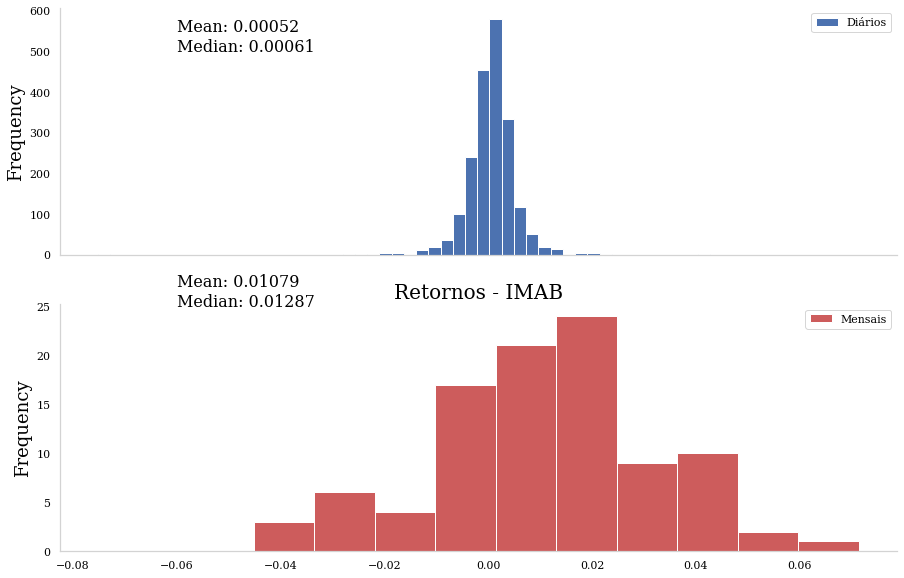

In [69]:
d_rets = imab_past.d_returns()
m_rets = imab_past.m_returns()

fig, (hist_d, hist_m) = plt.subplots(
    nrows=2, ncols=1, sharex=True,
    figsize=(15, 10)
)
plt.subplots_adjust(wspace=0.0)

plt.title('Retornos - IMAB')

d_rets.rename(columns={'Retornos': 'Diários'}).plot.hist(
    ax=hist_d,
    bins=50
)
hist_d.annotate(
    f'Mean: {d_rets.mean()[0]:.5f}\n'
    f'Median: {d_rets.median()[0]:.5f}',
    xy=(-.06, 500)
)
m_rets.rename(columns={'Retornos': 'Mensais'}).plot.hist(
    ax=hist_m, color='cornflowerblue'
)
hist_m.annotate(
    f'Mean: {m_rets.mean()[0]:.5f}\n'
    f'Median: {m_rets.median()[0]:.5f}',
    xy=(-.06, 25)
);
del d_rets, m_rets

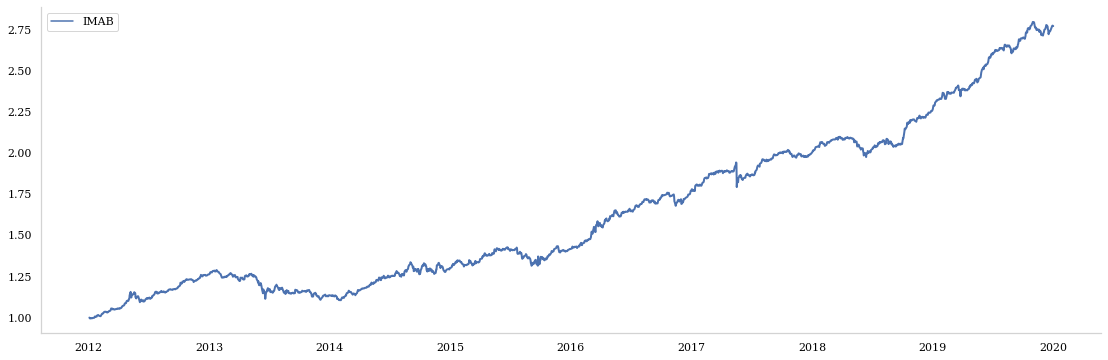

In [63]:
qt.plot_lines([imab_past.acm_returns()])

In [5]:
imab_past.volatility()

Diária    0.004922
Mensal    0.022555
Anual     0.078134
dtype: float64

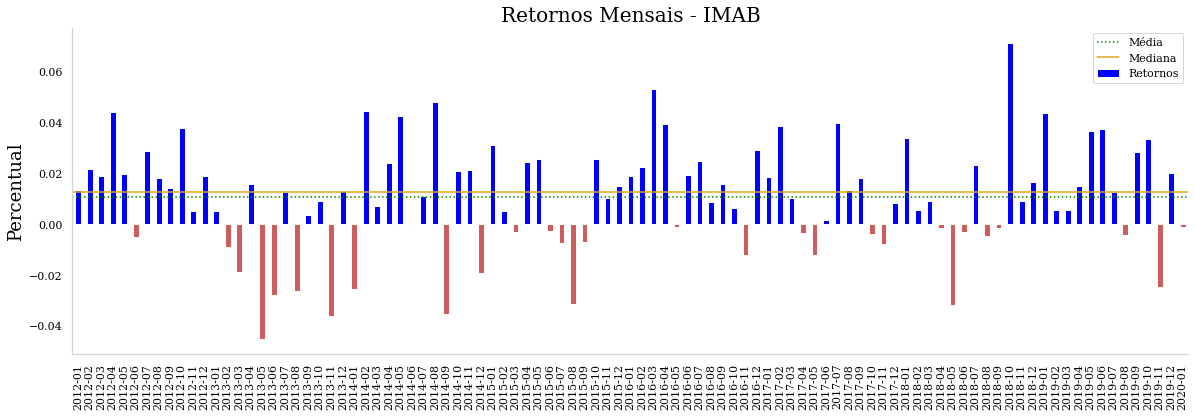

In [3]:
qt.plot_monthly_returns(
    imab_past.m_returns()['Retornos'],
    title='Retornos Mensais - IMAB',
    size=(20, 6)
)

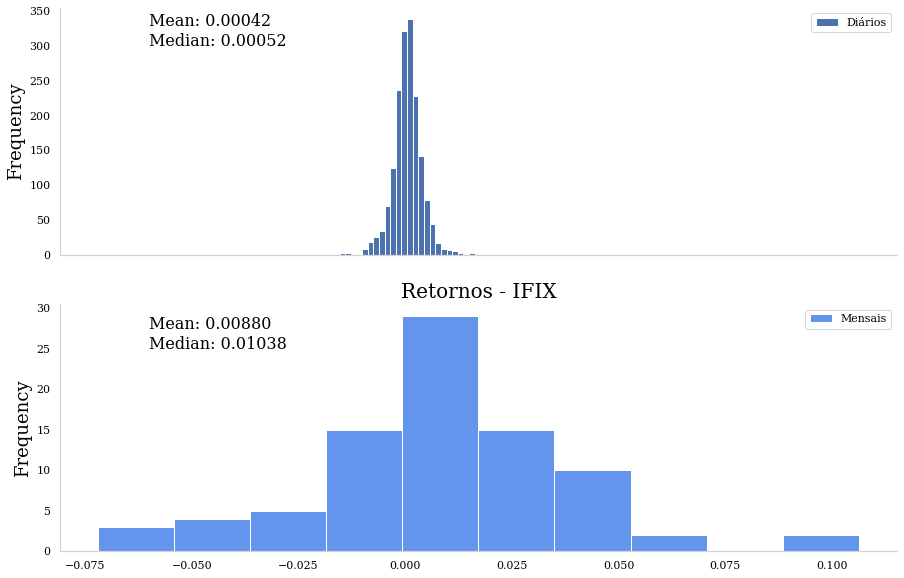

In [74]:
d_rets = ifix_past.d_returns()
m_rets = ifix_past.m_returns()

fig, (hist_d, hist_m) = plt.subplots(
    nrows=2, ncols=1, sharex=True,
    figsize=(15, 10)
)
plt.subplots_adjust(wspace=0.0)

plt.title('Retornos - IFIX')

d_rets.rename(columns={'Retornos': 'Diários'}).plot.hist(
    ax=hist_d,
    bins=50
)
hist_d.annotate(
    f'Mean: {d_rets.mean()[0]:.5f}\n'
    f'Median: {d_rets.median()[0]:.5f}',
    xy=(-.06, 300)
)
m_rets.rename(columns={'Retornos': 'Mensais'}).plot.hist(
    ax=hist_m, color='cornflowerblue'
)
hist_m.annotate(
    f'Mean: {m_rets.mean()[0]:.5f}\n'
    f'Median: {m_rets.median()[0]:.5f}',
    xy=(-.06, 25)
);
del d_rets, m_rets

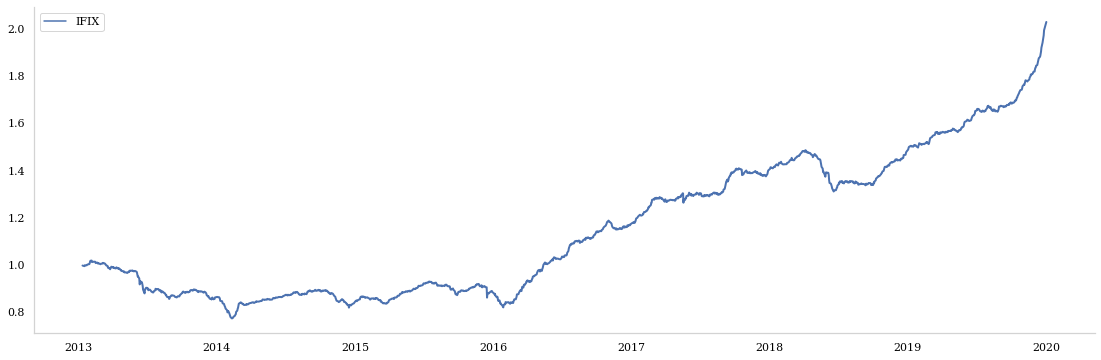

In [72]:
qt.plot_lines([ifix_past.acm_returns()])

In [6]:
ifix_past.volatility()

Diária    0.003736
Mensal    0.017119
Anual     0.059301
dtype: float64

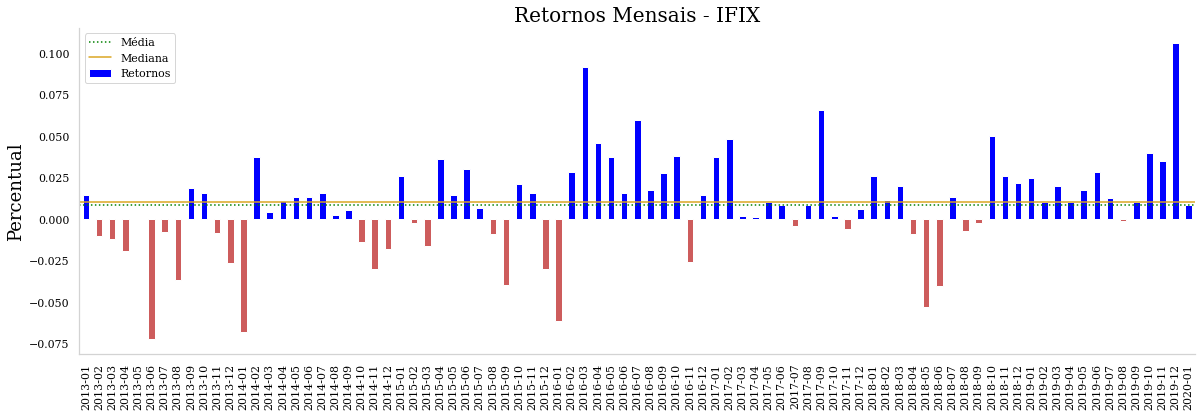

In [39]:
qt.plot_monthly_returns(
    ifix_past.m_returns()['Retornos'],
    title='Retornos Mensais - IFIX',
    size=(20, 6)
)

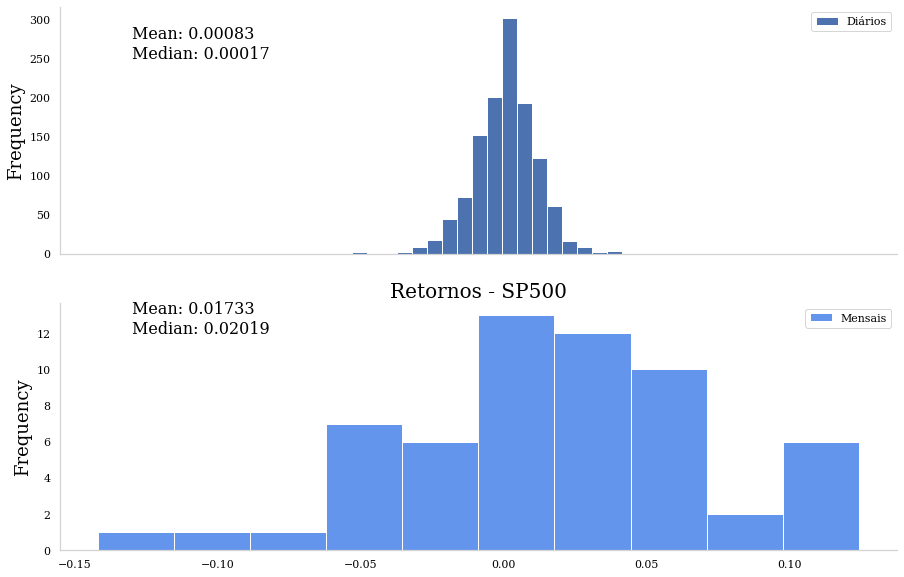

In [34]:
d_rets = sp500_past.d_returns()
m_rets = sp500_past.m_returns()

fig, (hist_d, hist_m) = plt.subplots(
    nrows=2, ncols=1, sharex=True,
    figsize=(15, 10)
)
plt.subplots_adjust(wspace=0.0)

plt.title('Retornos - SP500')

d_rets.rename(columns={'Retornos': 'Diários'}).plot.hist(
    ax=hist_d,
    bins=25
)
hist_d.annotate(
    f'Mean: {d_rets.mean()[0]:.5f}\n'
    f'Median: {d_rets.median()[0]:.5f}',
    xy=(-.13, 250)
)
m_rets.rename(columns={'Retornos': 'Mensais'}).plot.hist(
    ax=hist_m, color='cornflowerblue'
)
hist_m.annotate(
    f'Mean: {m_rets.mean()[0]:.5f}\n'
    f'Median: {m_rets.median()[0]:.5f}',
    xy=(-.13, 12)
);
del d_rets, m_rets

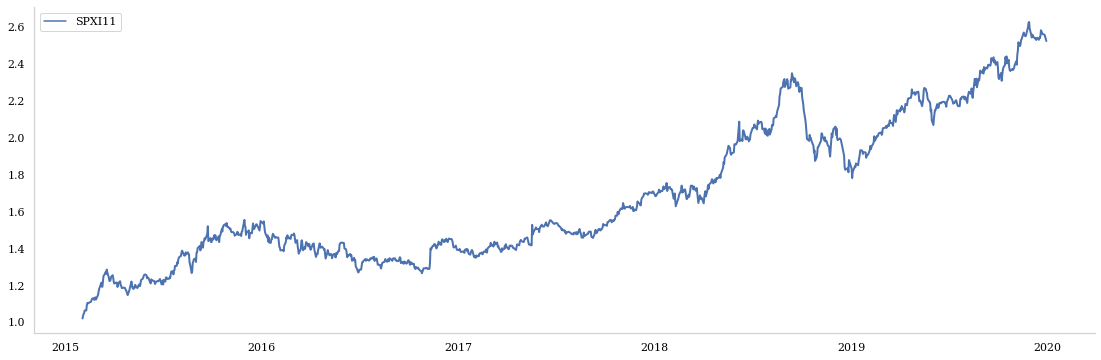

In [81]:
qt.plot_lines([sp500_past.acm_returns()])

In [7]:
sp500_past.volatility()

Diária    0.011145
Mensal    0.051074
Anual     0.176924
dtype: float64

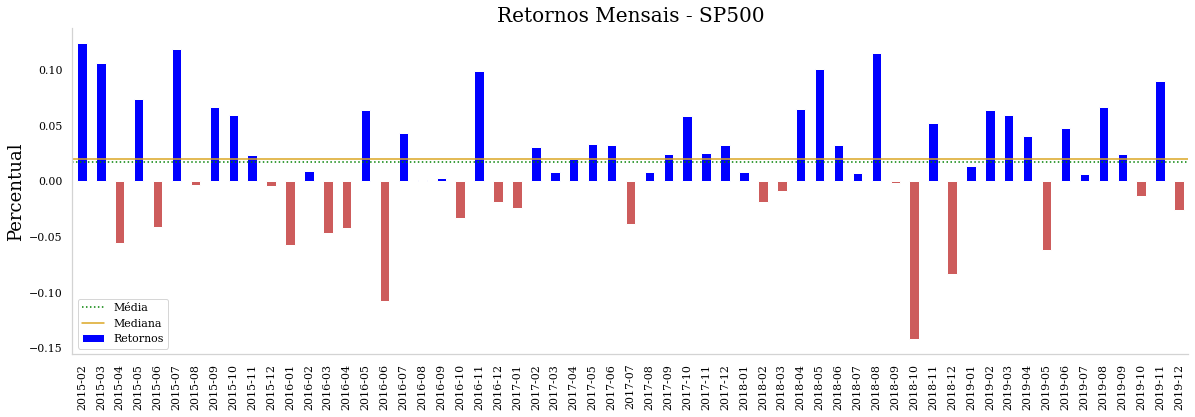

In [40]:
qt.plot_monthly_returns(
    sp500_past.m_returns()['Retornos'],
    title='Retornos Mensais - SP500',
    size=(20, 6)
)

In [8]:
ibvp_past_pr = qt.market_index('bvsp', start_past_dt, end_past_dt)
selic_past = qt.selic(start_past_dt, end_past_dt)

ibvp_past = Portfolio('IBVP Past', ['IBVP'])
ibvp_past.prices = ibvp_past_pr
ibvp_past.dates = (start_past_dt, end_past_dt)
Portfolio.register(ibvp_past)

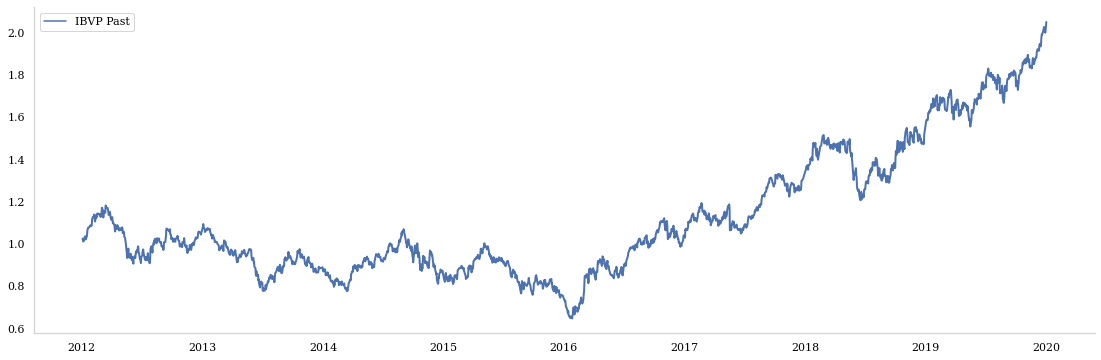

In [30]:
qt.plot_lines([ibvp_past.acm_returns()])

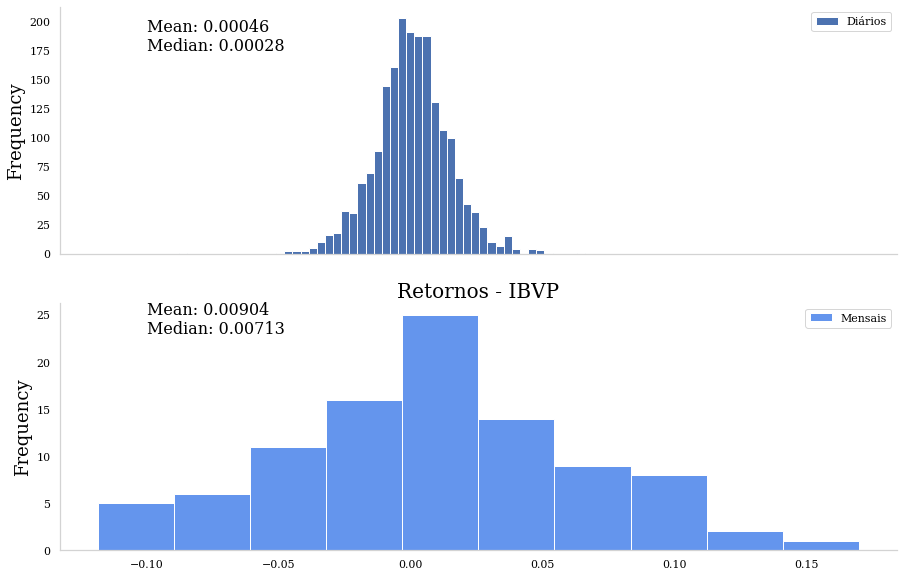

In [32]:
d_rets = ibvp_past.d_returns()
m_rets = ibvp_past.m_returns()

fig, (hist_d, hist_m) = plt.subplots(
    nrows=2, ncols=1, sharex=True,
    figsize=(15, 10)
)
plt.subplots_adjust(wspace=0.0)

plt.title('Retornos - IBVP')

d_rets.rename(columns={'Retornos': 'Diários'}).plot.hist(
    ax=hist_d,
    bins=50
)
hist_d.annotate(
    f'Mean: {d_rets.mean()[0]:.5f}\n'
    f'Median: {d_rets.median()[0]:.5f}',
    xy=(-.1, 175)
)
m_rets.rename(columns={'Retornos': 'Mensais'}).plot.hist(
    ax=hist_m, color='cornflowerblue'
)
hist_m.annotate(
    f'Mean: {m_rets.mean()[0]:.5f}\n'
    f'Median: {m_rets.median()[0]:.5f}',
    xy=(-.1, 23)
);
del d_rets, m_rets

In [9]:
ibvp_past.volatility()

Diária    0.014017
Mensal    0.064234
Anual     0.222512
dtype: float64

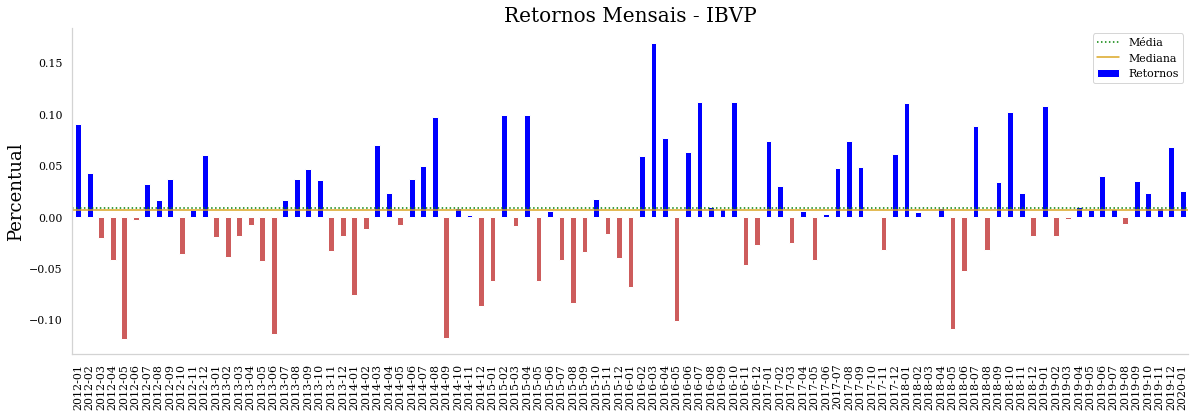

In [33]:
qt.plot_monthly_returns(
    ibvp_past.m_returns()['Retornos'],
    title='Retornos Mensais - IBVP',
    size=(20, 6)
)

In [10]:
df = imab_past + ifix_past
etfs_past = sp500_past + df
etfs_past.prices

Portfolio.unregister('IMAB + IFIX')
etfs_past.name = 'ETFs Past'
Portfolio.unregister('SPXI11 + IMAB + IFIX')

del df

In [11]:
etfs_past.prices.corr()

,SPXI11,IMAB,IFIX
SPXI11,1.000000,0.893590,0.852566
IMAB,0.893590,1.000000,0.979443
IFIX,0.852566,0.979443,1.000000


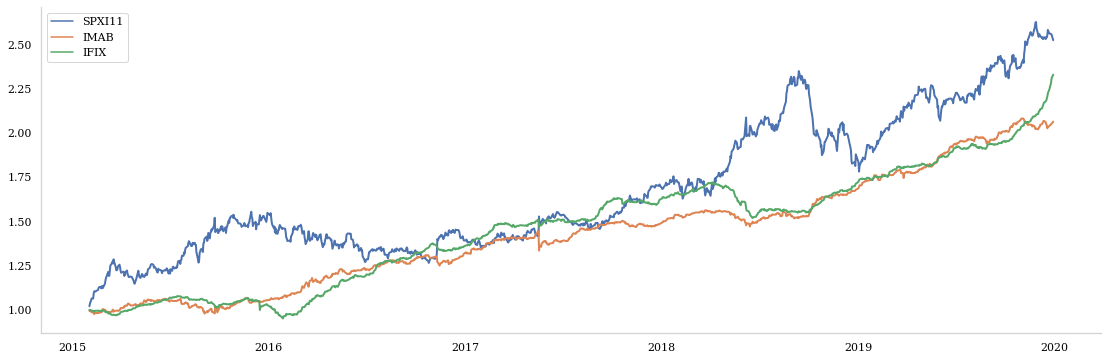

In [20]:
qt.plot_lines([etfs_past.acm_returns(is_portfolio=False)])

In [12]:
etfs_past.volatility(is_portfolio=True)

Diária    0.003589
Mensal    0.016446
Anual     0.056972
dtype: float64